In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import datetime

In [5]:
obama = pd.read_csv('D:\\Python\\Python36\\Practice\\Obama.csv', parse_dates=['start_date','end_date'])

In [6]:
obama.head()

,survey_organization,party_affiliation,start_date,end_date,survey_method,survey_question,survey_population,survey_sample,approve_percent,disapprove_percent,undecided_percent,margin_of_error,YearMonth
0,Democracy Corps (D),Democrat,2008-11-19,2008-11-23,Live Phone,NaN,Likely Voters,1000.0,53,20.0,28.0,3.0,2008-11
1,ABC News,None,2008-11-19,2008-11-23,Live Phone,NaN,Adults,1003.0,67,18.0,15.0,3.0,2008-11
2,CNN,None,2008-01-12,2008-02-12,Live Phone,NaN,Adults,1096.0,79,18.0,3.0,3.0,2008-12
3,USA Today/Gallup,None,2008-01-12,2008-01-12,Live Phone,NaN,Adults,1010.0,78,13.0,9.0,3.0,2008-12
4,AP-GFK,None,2008-03-12,2008-08-12,Live Phone,NaN,Adults,1000.0,73,14.0,8.0,3.1,2008-12


In [7]:
obama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   survey_organization  11696 non-null  object        
 1   party_affiliation    11696 non-null  object        
 2   start_date           11696 non-null  datetime64[ns]
 3   end_date             11696 non-null  datetime64[ns]
 4   survey_method        11696 non-null  object        
 5   survey_question      343 non-null    object        
 6   survey_population    11696 non-null  object        
 7   survey_sample        10063 non-null  float64       
 8   approve_percent      11696 non-null  int64         
 9   disapprove_percent   11510 non-null  float64       
 10  undecided_percent    5532 non-null   float64       
 11  margin_of_error      8199 non-null   float64       
 12  YearMonth            11696 non-null  object        
dtypes: datetime64[ns](2), float64(4

In [8]:
print(pd.DatetimeIndex(obama['start_date']).year)

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='start_date', length=11696)


In [36]:
obama_mean = (obama.groupby(['YearMonth'])['approve_percent'].mean()).reset_index()

In [37]:
obama_mean.head()

,YearMonth,approve_percent
0,2008-11,60.000000
1,2008-12,72.769231
2,2009-01,63.773585
3,2009-02,61.044248
4,2009-03,58.333333


In [38]:
obama_median= (obama.groupby(['YearMonth'])['approve_percent'].median()).reset_index()

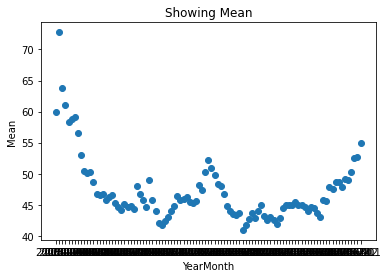

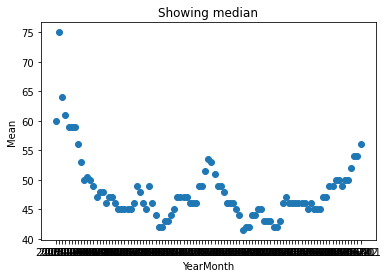

In [40]:
plt.scatter(obama_mean['YearMonth'], obama_mean['approve_percent'])
plt.xlabel('YearMonth')
plt.ylabel('Mean')
plt.title('Showing Mean')
plt.show()
plt.scatter(obama_median['YearMonth'], obama_median['approve_percent'])
plt.xlabel('YearMonth')
plt.ylabel('Mean')
plt.title('Showing median')
plt.show()

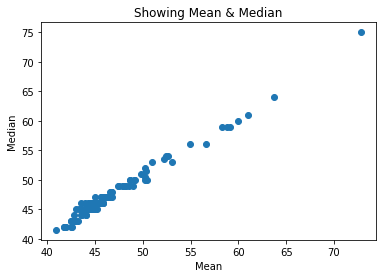

In [42]:
plt.scatter(obama_mean['approve_percent'], obama_median['approve_percent'])
plt.xlabel('Mean')
plt.ylabel('Median')
plt.title('Showing Mean & Median')
plt.show()

In [43]:
obama_median_index= obama.groupby(['YearMonth'])['approve_percent'].median()

In [47]:
obama_median_index.index

Index(['2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04',
       '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10',
       '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04',
       '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10',
       '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04',
       '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10',
       '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04',
       '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10',
       '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04',
       '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
       '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04',
       '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
       '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
       '2015-05', '2015-06', '2015-07', '2015-08', 

In [56]:
obama_25 = obama.groupby(['YearMonth'])['approve_percent'].quantile(0.25)
obama_25

YearMonth
2008-11    56.50
2008-12    72.00
2009-01    61.00
2009-02    59.00
2009-03    56.00
           ...  
2016-09    44.75
2016-10    46.00
2016-11    49.25
2016-12    48.00
2017-01    50.00
Name: approve_percent, Length: 99, dtype: float64

In [49]:
obama_75 = obama.groupby(['YearMonth'])['approve_percent'].quantile(0.75)

Text(0, 0.5, 'approve percent')

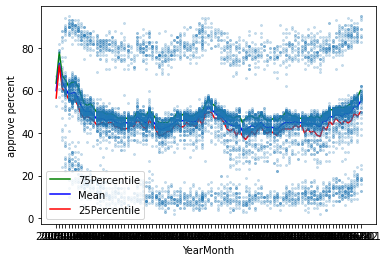

In [59]:
plt.plot(obama_75.index,obama_75, 'green')
plt.plot(obama_mean.index, obama_mean['approve_percent'], 'blue')
plt.plot(obama_25.index, obama_25, 'red')
plt.plot(obama['YearMonth'],obama['approve_percent'], 'o', markersize=2, alpha =0.2)
plt.legend(['75Percentile','Mean','25Percentile'])
plt.xlabel('YearMonth')
plt.ylabel('approve percent')